In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
energy_300 = np.loadtxt('T300_potential_energy.xvg', comments=['#', '@'])
energy_363 = np.loadtxt('T363_potential_energy.xvg', comments=['#', '@'])
energy_440 = np.loadtxt('T440_potential_energy.xvg', comments=['#', '@'])

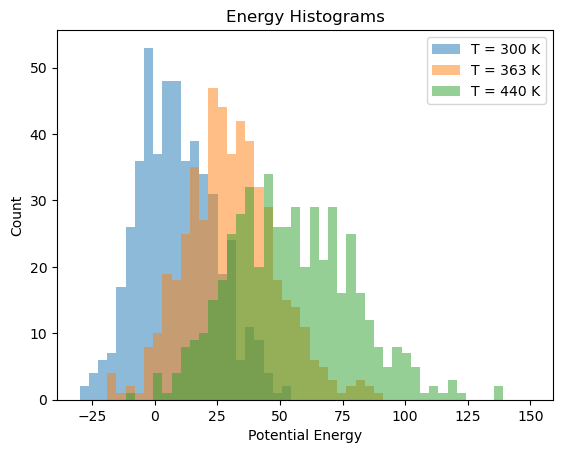

In [10]:
import matplotlib.pyplot as plt

bins = np.linspace(-30, 150, 50)

plt.hist(energy_300[:, 1], alpha=0.5, label='T = 300 K', bins=bins)
plt.hist(energy_363[:, 1], alpha=0.5, label='T = 363 K', bins=bins)
plt.hist(energy_440[:, 1], alpha=0.5, label='T = 440 K', bins=bins)

plt.xlabel('Potential Energy')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Energy Histograms')
plt.savefig('../Figures/energy_histograms.png')
plt.show()


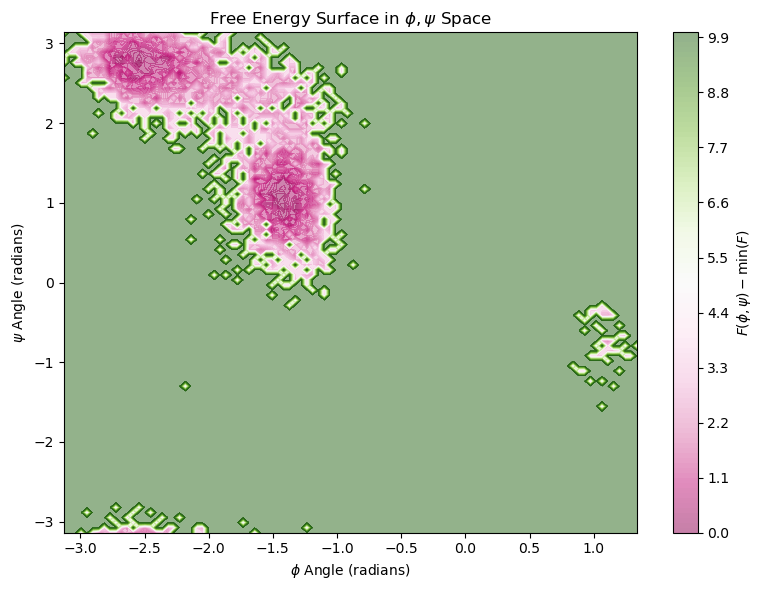

In [6]:
import mdtraj as md

traj = md.load('../Data/T300/adp_exchange3temps.trr', top='../Data/T300/adp_exchange3temps.gro')
# compute phi and psi angles
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)

# Compute 2D histogram
hist, xedges, yedges = np.histogram2d(phi_angles.reshape(-1), psi_angles.reshape(-1), bins=100, normed=True)
hist[hist == 0] = 1e-5  # Avoid log(0)

# Compute free energy
F = -np.log(hist)

# Subtract the minimum free energy
F -= np.min(F)

# limit the maximum free energy to 10
F[F > 10] = 10

plt.figure(figsize=(8, 6))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.contourf(F.T, 100, cmap="PiYG", extent=extent, alpha=0.5)
plt.colorbar(label=r"$F(\phi, \psi) - \min(F)$")
plt.xlabel(r'$\phi$ Angle (radians)')
plt.ylabel(r'$\psi$ Angle (radians)')
plt.title('Free Energy Surface in $\phi, \psi$ Space')
plt.tight_layout()
plt.savefig('../Figures/free_energy_surface_T300.png')
plt.show()

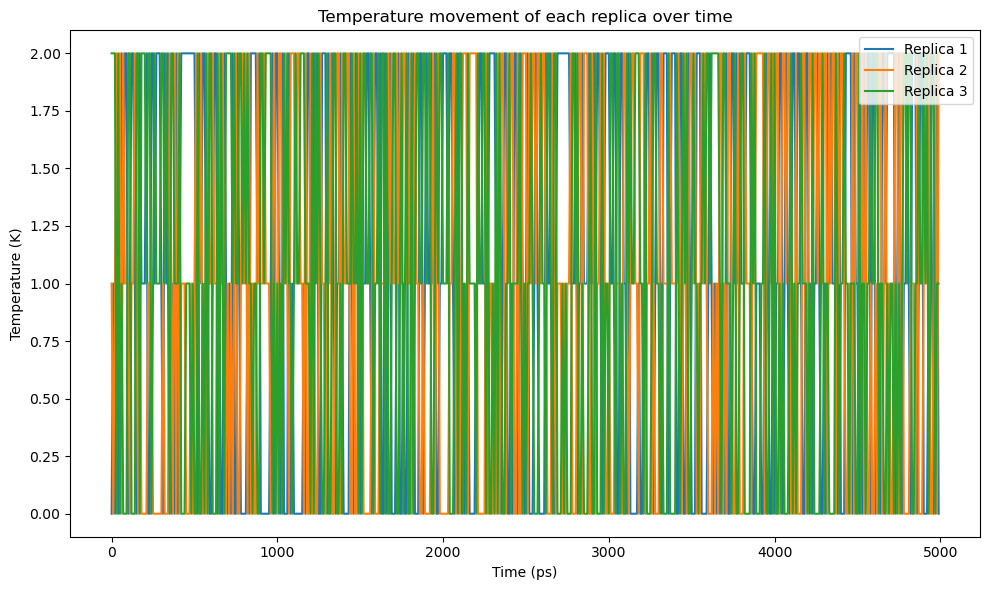

In [21]:
replica = np.loadtxt('T300_replica_temp.xvg')

time = replica[:, 0]
replica_temps = replica[:, 1:]

# Only plot every 1000th/100th point
time = time[::100]
replica_temps = replica_temps[::100, :]

# Plot
plt.figure(figsize=(10, 6))
for i, replica in enumerate(replica_temps.T, start=1):
    plt.plot(time, replica, label=f'Replica {i}')

plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.title('Temperature movement of each replica over time')
plt.legend()
plt.tight_layout()
plt.savefig('../Figures/replica_temperatures_every100.png')
plt.show()